In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, LassoCV

In [4]:
df = pd.read_csv('data/cleaned_grit_data.csv')
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (2200, 101)


,index,country,surveyelapse,GS1,GS2,GS3,GS4,GS5,GS6,GS7,...,browser,introelapse,testelapse,Extraversion,Neuroticism,Agreeableness,Conscientiousness,Openness,Grit,highgrit
0,4,JP,340,5,2,3,3,2,4,2,...,Firefox,3,337,1.2,2.5,3.3,3.8,3.0,3.083333,0
1,6,US,126,4,1,3,2,1,5,1,...,Chrome,36,212,4.0,2.0,3.6,3.4,5.0,2.583333,0
2,8,EU,130,5,3,3,5,4,5,5,...,Microsoft Internet Explorer,14,183,4.4,4.5,4.7,4.0,4.3,4.250000,1
3,10,AE,592,5,3,3,2,4,3,3,...,Chrome,726,311,3.0,4.6,3.6,3.8,3.4,3.166667,0
4,11,AU,217,3,1,1,2,1,3,1,...,Firefox,376,407,2.0,1.1,3.4,3.9,4.4,2.000000,0


#### Encoding Categorical Variables

In [5]:
# Binary Questions Yes/No -> 1/0 
df["voted"] = df["voted"].map({"Yes": 1, "No": 0})
df["engnat"] = df["engnat"].map({"Yes": 1, "No": 0})

df.head()

,index,country,surveyelapse,GS1,GS2,GS3,GS4,GS5,GS6,GS7,...,browser,introelapse,testelapse,Extraversion,Neuroticism,Agreeableness,Conscientiousness,Openness,Grit,highgrit
0,4,JP,340,5,2,3,3,2,4,2,...,Firefox,3,337,1.2,2.5,3.3,3.8,3.0,3.083333,0
1,6,US,126,4,1,3,2,1,5,1,...,Chrome,36,212,4.0,2.0,3.6,3.4,5.0,2.583333,0
2,8,EU,130,5,3,3,5,4,5,5,...,Microsoft Internet Explorer,14,183,4.4,4.5,4.7,4.0,4.3,4.250000,1
3,10,AE,592,5,3,3,2,4,3,3,...,Chrome,726,311,3.0,4.6,3.6,3.8,3.4,3.166667,0
4,11,AU,217,3,1,1,2,1,3,1,...,Firefox,376,407,2.0,1.1,3.4,3.9,4.4,2.000000,0


#### Personality Trait Interactions

In [6]:
df_engineered = df.copy()
traits = ['Openness', 'Conscientiousness', 
          'Extraversion', 'Agreeableness', 'Neuroticism']

In [7]:
# Create all pairwise interactions (10 total combinations)
interaction_features = []
for trait1, trait2 in combinations(traits, 2):
  feature_name = f'{trait1}_x_{trait2}'
  df_engineered[feature_name] = df_engineered[trait1] * df_engineered[trait2]
  interaction_features.append(feature_name)
  print(f"Created: {feature_name}")

print(f"\nTotal interaction features created: {len(interaction_features)}")

Created: Openness_x_Conscientiousness
Created: Openness_x_Extraversion
Created: Openness_x_Agreeableness
Created: Openness_x_Neuroticism
Created: Conscientiousness_x_Extraversion
Created: Conscientiousness_x_Agreeableness
Created: Conscientiousness_x_Neuroticism
Created: Extraversion_x_Agreeableness
Created: Extraversion_x_Neuroticism
Created: Agreeableness_x_Neuroticism

Total interaction features created: 10



Interaction Feature Correlations with Grit:
Conscientiousness_x_Agreeableness    0.615659
Conscientiousness_x_Neuroticism      0.599657
Openness_x_Conscientiousness         0.558125
Conscientiousness_x_Extraversion     0.524512
Agreeableness_x_Neuroticism          0.438798
Extraversion_x_Neuroticism           0.373226
Openness_x_Neuroticism               0.360135
Extraversion_x_Agreeableness         0.288706
Openness_x_Agreeableness             0.262775
Openness_x_Extraversion              0.214245
Name: Grit, dtype: float64


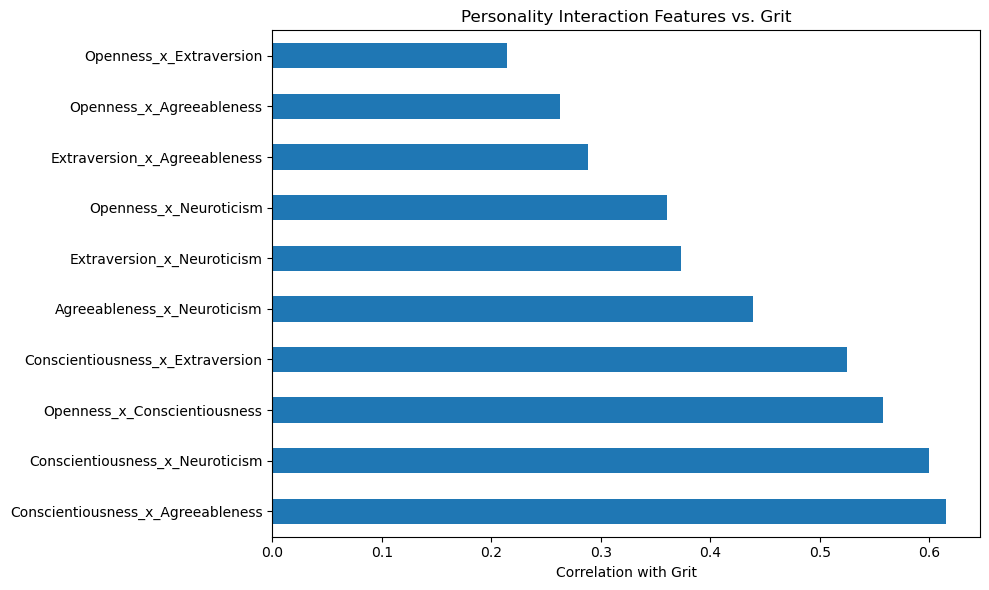

In [8]:
# Check correlations of interaction features with Grit + visualization
interaction_corr = df_engineered[interaction_features + ['Grit']].corr()['Grit'].drop('Grit').sort_values(ascending=False)
print("\nInteraction Feature Correlations with Grit:")
print(interaction_corr)

plt.figure(figsize=(10, 6))
interaction_corr.plot(kind='barh')
plt.xlabel('Correlation with Grit')
plt.title('Personality Interaction Features vs. Grit')
plt.tight_layout()
plt.show()

#### Demographic-Personality Interactions

In [9]:
# INCORRECT, GIVING ERROR
# Age × Conscientiousness
df_engineered['Age_x_Consc'] = df_engineered['age'] * df_engineered['Conscientiousness']

# Age × Openness
df_engineered['Age_x_Open'] = df_engineered['age'] * df_engineered['Openness']

# Education × Openness
df_engineered['Edu_x_Open'] = df_engineered['education'] * df_engineered['Openness']

# Education × Conscientiousness
df_engineered['Edu_x_Consc'] = df_engineered['education'] * df_engineered['Conscientiousness']

demographic_interactions = ['Age_x_Consc', 'Age_x_Open', 'Edu_x_Open', 'Edu_x_Consc']
print("Created demographic interaction features:")
for feat in demographic_interactions:
  print(f"  - {feat}")

TypeError: can't multiply sequence by non-int of type 'float'